In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def принт(*значения: object,
    раз: str | None = " ",
    кон: str | None = "\n"):

    print(*значения, раз, кон)

In [25]:
# Исходная функция
def f(x):
    return (x - 1) ** 2 - np.exp(x) / 2

In [26]:
# Производная функции порядка n
def df(x, n):
    return - np.exp(x) / 2

# Первая производная функции
def df1(x):
    return 2 * (x - 1) - (np.exp(x) / 2)

# Вторая производная функции
def df2(x):
    return 2 - (np.exp(x) / 2)

In [27]:
# Границы отрезка
a, b = [0.1, 0.6]

In [28]:
n_start, n_stop = 3, 100

In [29]:
таблица = {'n': [], 'Δf': [], '∂f': []}

In [30]:
for n in range(n_start, n_stop + 1):

    # Создание df с узловыми точками
    tmp = np.linspace(a, b, n + 1)
    points = pd.DataFrame({'x': tmp, 'y': f(tmp)})

    A, B, C = [0 for _1 in range(n + 1)], [0 for _1 in range(n + 1)], [0 for _1 in range(n + 1)]
    F = [0 for _1 in range(n + 1)]

    # Заполняем коэффициенты системы в соответствии с методом наклонов

    for _1 in range(1, n):
        h0 = points['x'][_1] - points['x'][_1 - 1]
        h1 = points['x'][_1 + 1] - points['x'][_1]

        A[_1] = µ = h1 / (h1 + h0)
        B[_1] = 2
        C[_1] = λ = h0 / (h1 + h0)

        F[_1] = 3 * (λ * (points['y'][_1 + 1] - points['y'][_1]) / h1 + 
                     µ * (points['y'][_1] - points['y'][_1 - 1]) / h0)
        
    # Добавляем первое краевое условие (равенство на концак первых производных)
        
    B[0] = B[n] = 1
    
    F[0] = df1(points['x'][0])
    F[n] = df1(points['x'][n])

    # Метод прогонки
    # Заводим массивы для прогоночных коэффициентов и искомых значений
    m = [0 for _1 in range(n + 1)]
    alpha, beta = [0 for _1 in range(n + 1)], [0 for _1 in range(n + 1)]

    # Получаем первые коэффициенты из первого уравнения
    alpha[0] = - C[0] / B[0]
    beta[0] = F[0] / B[0]

    # Прямой ход прогонки
    for _1 in range(1, n + 1):
        alpha[_1] = - C[_1] / (B[_1] + A[_1] * alpha[_1 - 1])
        beta[_1] = (F[_1] - A[_1] * beta[_1 - 1]) / (B[_1] + A[_1] * alpha[_1 - 1])
    
    # Вычисляем m_n
    m[n] = (F[n] - A[n] * beta[n]) / (A[n] * alpha[n] + B[n])

    # Обратный ход прогонки
    for _1 in range(n - 1, -1, -1):
        m[_1] = alpha[_1 - 1] * m[_1 + 1] + beta[_1 + 1]

    # Массив для коэффициентов a и b для дальнейшего построения сплайнов
    ai, bi = [0 for _1 in range(n)], [0 for _1 in range(n)]

    # Вычисления коэффициантов интерполяционных кубических полиномов
    for _1 in range(0, n):
        h1 = points['x'][_1 + 1] - points['x'][_1]

        ai[_1] = (6 / h1) * ((points['y'][_1 + 1] - points['y'][_1]) / h1 - (m[_1 + 1] + 2 * m[_1]) / 3)
        bi[_1] = (12 / h1 ** 2) * ((m[_1 + 1] + m[_1]) / 2 - (points['y'][_1 + 1] - points['y'][_1]) / h1)

    # Заполнение таблицы
    таблица['n'].insert(n - n_start, n)

    tmp = []
    for _1 in range(n):
        X = np.linspace(points['x'][_1], points['x'][_1 + 1], 1000)
        Y = points['y'][_1] + m[_1] * (X - points['x'][_1]) + ai[_1] * (X - points['x'][_1]) ** 2 / 2 + bi[_1] * (X - points['x'][_1]) ** 3 / 6 - f(X)
        tmp = [*tmp, *Y]
    tmp = max(np.abs(tmp))
    таблица['Δf'].insert(n - n_start, tmp)

    таблица['∂f'].insert(n - n_start, tmp / max(np.abs(f(np.linspace(a, b, 1000)))))

таблица = pd.DataFrame(таблица)

In [31]:
таблица

,n,Δf,∂f
0,3,0.018770,0.024992
1,4,0.011097,0.014776
2,5,0.008489,0.011303
3,6,0.006964,0.009273
4,7,0.005908,0.007866
...,...,...,...
93,96,0.000461,0.000614
94,97,0.000456,0.000608
95,98,0.000452,0.000602
96,99,0.000447,0.000596


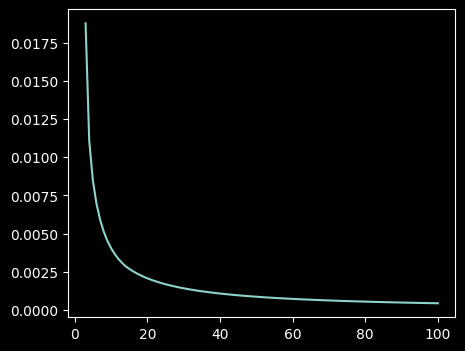

In [32]:
# Визуализация зависимости ошибки от n
plt.figure(figsize=(5, 4))
plt.plot(таблица['n'], таблица['Δf'])
plt.savefig('1.jpg', dpi=300)
plt.show()

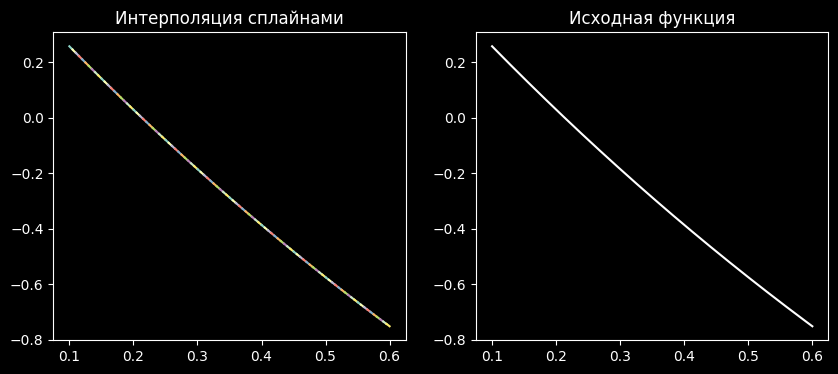

In [33]:
# Визуализация для n=100
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
for _1 in range(n):
    X = np.linspace(points['x'][_1], points['x'][_1 + 1], 1000)
    Y = points['y'][_1] + m[_1] * (X - points['x'][_1]) + ai[_1] * (X - points['x'][_1]) ** 2 / 2 + bi[_1] * (X - points['x'][_1]) ** 3 / 6
    plt.plot(X, Y)
plt.title('Интерполяция сплайнами')

plt.subplot(1, 2, 2)
tmp = np.linspace(a, b, 1000)
plt.plot(tmp, f(tmp), 'w')
plt.title('Исходная функция')

plt.show()